## 4주차 과제_0328(금)


파이썬 머신러닝 완벽 가이드 개정 2판 8장 p509~534

### 텍스트 분류 실습 - 20 뉴스그룹 분류

텍스트 분류 : 특정 문서의 분류를 학습 데이터를 통해 학습해 모델을 생성한 뒤 이 학습 모델을 이용해 다른 문서의 분류를 예측하는 것

희소 행렬에 분류를 효과적으로 잘 처리할 수 있는 알고리즘 : 로지스틱 회귀, 선형 서포트 벡터 머신, 나이브 베이즈 등

<텍스트를 기반으로 분류하는 과정>

1. 텍스트를 정규화한 뒤 피처 벡터화 적용
2. 적합한 머신러닝 알고리즘을 적용해 분류를 학습/예측/평가

### 텍스트 정규화

In [2]:
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset='all', random_state=156)

In [3]:
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [4]:
import pandas as pd

print('target 클래스의 값과 분포도 \n', pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들 \n', news_data.target_names)

target 클래스의 값과 분포도 
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
Name: count, dtype: int64
target 클래스의 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [5]:
print(news_data.data[0])

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:
> 
> The question for the day is re: passenger helmets, if you don't know for 
>certain who's gonna ride with you (like say you meet them at a .... church 
>meeting, yeah, that's the ticket)... What are some guidelines? Should I just 
>pick up another shoei in my size to have a backup helmet (XL), or should I 
>maybe get an inexpensive one of a smaller size to accomodate my likely 
>passenger? 

If your primary concern is protecting the passenger in the event of a
crash, have him or her fitted for a helmet that is their size.  If your
primary concern is complying with stupid helmet laws, carry a real big
spare (you can put a big or small head in a big helmet, bu

뉴스그룹 기사 내용, 제목, 작성자, 소속, 이메일 등의 다양한 정보를 포함

→ 내용을 제외하고 다른 정보는 제거

> 제목과 소속, 이메일 주소 등의 헤더와 푸터 정보들은 뉴스그룹 분류의 Target 클래스 값과 유사한 데이터를 가지고 있는 경우가 많아 상당히 높은 예측 성능을 나타내 텍스트 분석의 의도를 벗어나게 되기 때문

In [6]:
from sklearn.datasets import fetch_20newsgroups

# subset='train'으로 학습용 데이터만 추출, remove = ('headers', 'footers', 'quotes')로 내용만 추출
train_news = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'),
                                random_state=156)

X_train = train_news.data
y_train = train_news.target

# subset='test'으로 테스트 데이터만 추출, remove = ('headers', 'footers', 'quotes')로 내용만 추출
test_news = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'),
                                random_state=156)

X_test = test_news.data
y_test = test_news.target

print('학습 데이터 크기 {0}, 테스트 데이터 크기 {1}'.format(len(train_news.data), len(test_news.data)))

학습 데이터 크기 11314, 테스트 데이터 크기 7532


### 피처 벡터화 변환과 머신러닝 모델 학습/예측/평가

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorization으로 피처 벡터화 변환 수행
cnt_vect = CountVectorizer()
cnt_vect.fit(X_train)
X_train_cnt_vect = cnt_vect.transform(X_train)

# 학습 데이터로 fit()된 CountVectorizer를 이용해 테스트 데이터를 피처 벡터화 변환 수행
## 학습 시 설정된 CountVectorizer의 피처 개수와 테스트 데이터를 변환할 피처 개수가 동일하게 하기 위해서
X_test_cnt_vect = cnt_vect.transform(X_test)

print('학습 데이터 텍스트의 CountVectorizer Shape:', X_train_cnt_vect.shape)

학습 데이터 텍스트의 CountVectorizer Shape: (11314, 101631)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# LogisticRegression을 이용해 학습/예측/평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train_cnt_vect, y_train)
pred = lr_clf.predict(X_test_cnt_vect)
print('CountVectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

CountVectorized Logistic Regression의 예측 정확도는 0.603


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화를 적용해 학습 데이터 세트와 테스트 데이터 세트 변환
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

# LogisticRegression을 이용해 학습/예측/평가 수
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train_tfidf_vect, y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

TF-IDF Logistic Regression의 예측 정확도는 0.678


TF-IDF가 단군 카운트 기반보다 훨씬 더 높은 예측 정확도 제공

일반적으로 문서 내에 텍스트가 많고 많은 문서를 가지는 텍스트 분석의 결과

<텍스트 분석에서 머신러닝 모델의 성능을 향상시키는 방법>

1. 최적의 ML 알고리즘 선택

2. 최상의 피처 전처리 수행

In [10]:
# stop words 필터링을 추가하고 ngram을 기본 (1,1)에서 (1,2)로 변경해 피처 벡터화 적용
tfidf_vect = TfidfVectorizer(stop_words = 'english', ngram_range = (1,2), max_df = 300)
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train_tfidf_vect, y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

TF-IDF Vectorized Logistic Regression의 예측 정확도는 0.690


In [11]:
from sklearn.model_selection import GridSearchCV

# 최적 C 값 도출 튜닝 수행. CV는 3 폴드 세트로 설정
params = {'C': [0.01, 0.1, 1, 5, 10]}
grid_cv_lr = GridSearchCV(lr_clf, param_grid = params, cv = 3, scoring = 'accuracy', verbose = 1)
grid_cv_lr.fit(X_train_tfidf_vect, y_train)
print('Logistic Regression best C parameter:', grid_cv_lr.best_params_)

# 최적 C 값으로 학습된 grid_cv로 예측 및 정확도 평가
pred = grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Logistic Regression best C parameter: {'C': 10}
TF-IDF Vectorized Logistic Regression의 예측 정확도는 0.704


### 사이킷런 파이프라인(Pipeline) 사용 및 GridSearchCV와의 결합

Pipeline의 장점

1. 데이터의 전처리와 머신러닝 학습 과정을 통일한 API 기반에서 처리 가능해 더 직관적인 ML 모델 코드 생성 가능

2. 대용량 데이터의 피처 벡터화 결과를 별도 데이터로 저장하지 않고 스트림 기반에서 바로 머신러닝 알고리즘의 데이터로 입력할 수 있어 수행 시간 절약 가능

In [13]:
from sklearn.pipeline import Pipeline

# Pipeline 객체 선언
pipline = Pipeline([('tfidf_vect', TfidfVectorizer(stop_words = 'english')),
                    ('lr_clf', LogisticRegression(random_state = 156))])

In [14]:
from sklearn.pipeline import Pipeline

# TfidVectorizer 객체를 tfidf_vect로, LogisticRegression 객체를 lr_clf로 생성하는 Pipeline 생성
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words = 'english', ngram_range = (1,2), max_df = 300)),
    ('lr_clf', LogisticRegression(solver = 'liblinear', C = 10))])

# 별도의 TfidVectorizer 객체의 fit(), transform()과 LogisticRegression의 fit(), predict()가 필요 없음
# pipeline의 fit()과 predict()만으로 한꺼번에 피처 벡터화와 ML 학습/예측 가능
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print('Pipeline을 통한 Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

Pipeline을 통한 Logistic Regression의 예측 정확도는 0.704


In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('tfidf_vect', TfidfVectorizer(stop_words = 'english')),
                    ('lr_clf', LogisticRegression())])

# Pipeline에 기술된 각각의 객체 변수에 언더바 2개를 연달아 붙여 GridSearchCV에 사용될 파라미터/하이퍼 파라미터 이름과 값을 설정
params = {'tfidf_vect__ngram_range':[(1,1),(1,2),(1,3)],
          'tfidf_vect__max_df':[100, 300, 700],
          'lr_clf__C':[1,5,10]}

# GridSearchCV의 생성자에 Estimator가 아닌 Pipeline 객체 입력
grid_cv_pipe = GridSearchCV(pipeline, param_grid = params, cv = 3, scoring = 'accuracy', verbose = 1)
grid_cv_pipe.fit(X_train, y_train)
print(grid_cv_pipe.best_params_, grid_cv_pipe.best_score_)

pred = grid_cv_pipe.predict(X_test)
print('Pipeline을 통한 Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'lr_clf__C': 10, 'tfidf_vect__max_df': 300, 'tfidf_vect__ngram_range': (1, 2)} 0.7533152393023013
Pipeline을 통한 Logistic Regression의 예측 정확도는 0.701


## 감정 분석

### 감정 분석 소개

감정 분석

문서의 주관적인 감성/의견/감정/기분 등을 파악하기 위한 방법

문서 내 텍스트가 나타내는 여러 가지 주관적인 단어와 문맥을 기반으로 감성 수치를 계산하는 방법을 이용함

긍정 감정 지수와 부정 감성 지수로 구성되며 이를 합산해 긍정 감성 또는 부정 감성을 결정함

- 지도학습 방식 : 학습 데이터와 타깃 레이블 값을 기반으로 감성 분석 학습을 수행한 뒤 이를 기반으로 다른 데이터의 감성 분석을 예측하는 방법으로 일반적인 텍스트 기반의 분류와 거의 동일함

- 비지도학습 방식 : 'Lexicon'이라는 일종의 감성 어휘 사전 이용, Lexicon은 감성 분석을 위한 용어와 문맥에 대한 다양한 정보를 가지고 있으며, 이를 이용해 문서의 긍정적, 부정적 감성 여부를 판단함

### 지도학습 기반 감성 분석 실습 - IMDB 영화평

In [16]:
import pandas as pd

review_df = pd.read_csv('/content/labeledTrainData.tsv', header = 0, sep = '\t', quoting = 3)
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


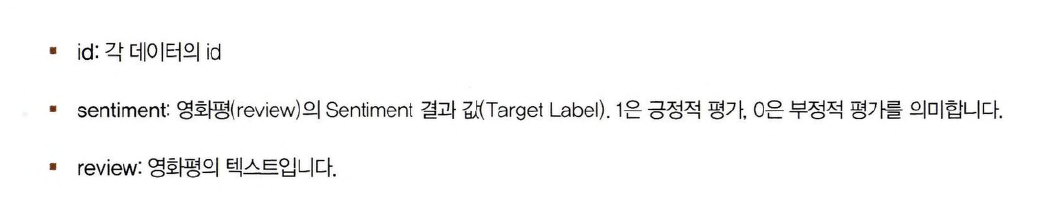

In [17]:
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [18]:
import re

# <br> html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />', ' ')

# 파이썬의 정규 표현식 모듈인 re를 이용해 영어 문자열이 아닌 문자는 모두 공백으로 변환
review_df['review'] = review_df['review'].apply(lambda x : re.sub('[^a-zA-Z]', ' ', x))

In [19]:
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
feature_df = review_df.drop(['id', 'sentiment'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df, test_size = 0.3, random_state = 156)

X_train.shape, X_test.shape

((17500, 1), (7500, 1))

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 스톱 워드는 English, ngram은 (1,2)로 설정해 CountVectorization 수행
# LogisticRegression의 C는 10으로 설정
pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words = 'english', ngram_range = (1, 2))),
    ('lr_clf', LogisticRegression(solver = 'liblinear', C = 10))
])

# Pipeline 객체를 이용해 fit(), predict()로 학습/예측 수행 predict_proba()는 roc_auc 때문에 수행
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:, 1]

print('예측 정확도는 {0:4f}, ROC_AUC는 {1:4f}'.format(accuracy_score(y_test, pred), roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.886133, ROC_AUC는 0.950262


In [21]:
# 스톱 워드는 English, filtering, ngram은 (1,2)로 설정해 TF-IDF 벡터화 수행
# LogisticRegression의 C는 10으로 설정
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words = 'english', ngram_range=(1,2))),
    ('lr_clf', LogisticRegression(solver = 'liblinear', C = 10))
])

# Pipeline 객체를 이용해 fit(), predict()로 학습/예측 수행 predict_proba()는 roc_auc 때문에 수행
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:, 1]

print('예측 정확도는 {0:4f}, ROC_AUC는 {1:4f}'.format(accuracy_score(y_test, pred), roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.893600, ROC_AUC는 0.959801


### 비지도학습 기반 감성 분석 소개

주로 감성만을 분석하기 위해 지원하는 감성 어휘 사전인 Lexicon을 기반으로 함

감성 사전은 긍정 감성 또는 부정 감성의 정도를 의미하는 수치를 가지고 있으며 이를 감성 지수라고 한다.

감성 지수는 단어의 위치나 주변 단어, 문맥, POS 등을 참고해 결정됨

**<NLTK에서 WordNet 묘듈>**

방대한 영어 어휘 사전으로 시맨틱(semantic, 문맥상 의미) 분석을 제공함

다양란 상황에서 같은 어휘라도 다르게 사용되는 어휘의 시맨틱 정보를 제공하며 이를 위해 각각의 품사로 구성된 개별 단어를 Synset이라는 개념을 이용해 표현함

<예측 성능이 좋지 않은 NLTK 대신 사용하는 대표적 감성 사전>

- SentiWordNet

- VADER

- Pattern

### SentiWordNet을 이용한 감성 분석

In [22]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [23]:
from nltk.corpus import wordnet as wn

term = 'present'

# 'present'라는 단어로 wordnet의 synsets 생성
synsets = wn.synsets(term)
print('synsets() 반환 type:', type(synsets))
print('synsets() 반환 값 개수:', len(synsets))
print('synsets() 반환 값:', synsets)

synsets() 반환 type: <class 'list'>
synsets() 반환 값 개수: 18
synsets() 반환 값: [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


In [24]:
for synset in synsets:
    print('##### Synset name :', synset.name(), '#####')
    print('POS:', synset.lexname())
    print('Definition:', synset.definition())
    print('Lemmas:', synset.lemma_names)

##### Synset name : present.n.01 #####
POS: noun.time
Definition: the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas: <bound method Synset.lemma_names of Synset('present.n.01')>
##### Synset name : present.n.02 #####
POS: noun.possession
Definition: something presented as a gift
Lemmas: <bound method Synset.lemma_names of Synset('present.n.02')>
##### Synset name : present.n.03 #####
POS: noun.communication
Definition: a verb tense that expresses actions or states at the time of speaking
Lemmas: <bound method Synset.lemma_names of Synset('present.n.03')>
##### Synset name : show.v.01 #####
POS: verb.perception
Definition: give an exhibition of to an interested audience
Lemmas: <bound method Synset.lemma_names of Synset('show.v.01')>
##### Synset name : present.v.02 #####
POS: verb.communication
Definition: bring forward and present to the mind
Lemmas: <bound method Synset.lemma_names of Synset('present.v.02')>
##### Synset nam

In [27]:
# synset 객체를 단어별로 생성
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree, lion, tiger, cat, dog]
simliarities = []
entity_names = [entity.name().split('.')[0] for entity in entities]

# 단어별 synset을 반복하면서 다른 단어의 synset과 유사도를 측정
for entity in entities :
    similarity = [round(entity.path_similarity(compared_entity), 2) for compared_entity in entities]
    simliarities.append(similarity)

# 개별 단어별 synset과 다른 단어의 synset과의 유사도를 DataFramem 형태로 저장
similarity_df = pd.DataFrame(simliarities, columns = entity_names, index = entity_names)
similarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


In [28]:
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type:', type(senti_synsets))
print('senti_synsets() 반환 값 개수:', len(senti_synsets))
print('senti_synsets() 반환 값:', senti_synsets)

senti_synsets() 반환 type: <class 'list'>
senti_synsets() 반환 값 개수: 11
senti_synsets() 반환 값: [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


In [29]:
import nltk
from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset('father.n.01')

print('father 긍정감성 지수:', father.pos_score())
print('father 부정감성 지수:', father.neg_score())
print('father 객관성 지수:', father.obj_score())
print('\n')
fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수:', fabulous.pos_score())
print('fabulous 부정감성 지수:', fabulous.neg_score())

father 긍정감성 지수: 0.0
father 부정감성 지수: 0.0
father 객관성 지수: 1.0


fabulous 긍정감성 지수: 0.875
fabulous 부정감성 지수: 0.125


### SentiWordNet을 이용한 영화 감상평 감성 분석

<감성 분석 수행 순서>
1. 문서를 문장 단위로 분해
2. 다시 문장을 단어 단위로 토큰화하고 품사 태깅
3. 품사 태깅된 단어 기반으로 synset 객체와 senti_synset 객체를 생성
4. senti_synset 객체에서 긍정 감성/부정 감성 지수를 구하고 이를 모두 합산해 특정 임계치 값 이상일 때 긍정 감성으로 그렇지 않을 때는 부정 감성으로 결정

In [30]:
from nltk.corpus import wordnet as wn

# 간단한 NLTK PennTreebank Tag을 기반으로 WordNet 기반의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB

In [33]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화
    sentiment = 0.0
    tokens_count = 0

    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산
    for raw_sentence in raw_sentences:
        # NTLK 기반의 품사 태깅 문장 추출
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word, tag in tagged_sentence:

            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
            lemma = lemmatizer.lemmatize(word, pos = wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체 생성
            synsets = wn.synsets(lemma, pos = wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())
            tokens_count += 1

        if not tokens_count:
            return 0

        # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
        if sentiment >= 0 :
            return 1

        return 0

In [34]:
review_df['preds'] = review_df['review'].apply(lambda x: swn_polarity(x))
y_target = review_df['sentiment'].values
preds = review_df['preds'].values

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

print(confusion_matrix(y_target, preds))
print("정확도 : ", np.round(accuracy_score(y_target, preds), 4))
print("정밀도: ", np.round(precision_score(y_target, preds), 4))
print("재현율: ", np.round(recall_score(y_target, preds), 4))

[[7669 4831]
 [3635 8865]]
정확도 :  0.6614
정밀도:  0.6473
재현율:  0.7092


### VADER를 이용한 감성 분석

In [36]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0])
print(senti_scores)

{'neg': 0.13, 'neu': 0.743, 'pos': 0.127, 'compound': -0.7943}


In [37]:
def vader_polarity(review, threshold=0.1):
  analyzer = SentimentIntensityAnalyzer()
  scores = analyzer.polarity_scores(review)

  # compound 값에 기반해 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환
  agg_score = scores['compound']
  final_sentiment = 1 if agg_score >= threshold else 0
  return final_sentiment

# apply lambda 식을 이용해 레코드별로 vader_polarity()를 수행하고 결과를 'vader_preds'에 저장
review_df['vader_preds'] = review_df['review'].apply(lambda x: vader_polarity(x, 0.1))
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

print(confusion_matrix(y_target, vader_preds))
print("정확도:", np.round(accuracy_score(y_target, vader_preds), 4))
print("정밀도:", np.round(precision_score(y_target, vader_preds), 4))
print("재현율:", np.round(recall_score(y_target, vader_preds), 4))

[[ 6747  5753]
 [ 1858 10642]]
정확도: 0.6956
정밀도: 0.6491
재현율: 0.8514
